Text(0,0.5,'DJIA Index')

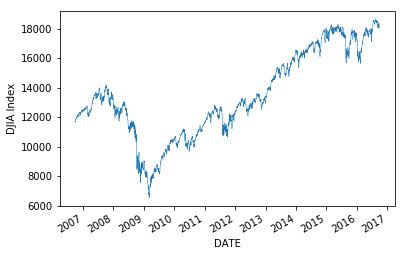

In [13]:
import numpy as np
import pandas as pd
import scipy.stats as st
from matplotlib import pyplot as plt
from pydataset import data
from datetime import datetime

km = pd.read_csv("DJIA.csv", index_col = 'DATE', parse_dates = True)
km = pd.to_numeric(km.VALUE, errors = 'coerce')
km = km.dropna()
km.plot(lw = .5)
plt.ylabel("DJIA Index")


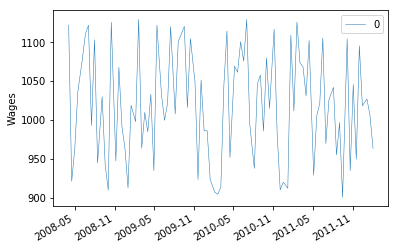

In [32]:
km = pd.read_csv("paychecks.csv", header = None)
x = pd.date_range(start='3/28/2008', periods=93, freq="WOM-1FRI")
y = pd.date_range(start='3/28/2008', periods=93, freq="WOM-3FRI")
xy = x.union(y)
km.index =  xy[:93]
km.plot(lw = 0.5)
plt.ylabel('Wages')
plt.show()

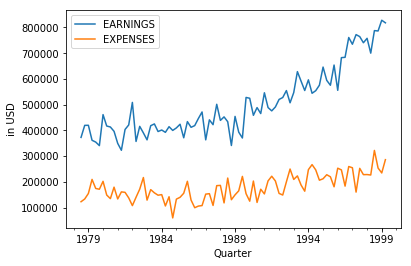

In [38]:
mk = pd.read_csv("finances.csv")
p = pd.period_range(start="1978-09", periods=len(mk), freq="Q-DEC")
mk.index = p
mk.plot()
plt.xlabel("Quarter")
plt.ylabel("in USD")
plt.show()

Text(0,0.5,'Duration in Seconds')

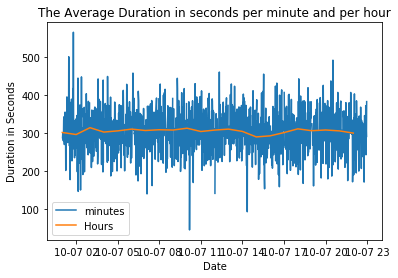

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt

data = pd.read_csv('website_traffic.csv', header=0)
data['ENTER']=pd.to_datetime(data['ENTER'])
data['LEAVE']=pd.to_datetime(data['LEAVE'])
data['DURATION']=(data['LEAVE']-data['ENTER']).dt.seconds
minutes = data.set_index('ENTER')['DURATION']
data
plt.plot(minutes.resample("T").mean(), label='minutes')
plt.legend()
plt.plot(minutes.resample("H").mean(), label='Hours')
plt.legend()
plt.title('The Average Duration in seconds per minute and per hour')
plt.xlabel('Date')
plt.ylabel('Duration in Seconds')

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt

data = pd.read_csv('DJIA.csv', header=0)
x=pd.to_datetime(data['DATE'])
data['DATE']=x
data =data.set_index(data['DATE'])
data=data.drop(columns=['DATE'])
data['VALUE']=pd.to_numeric(data['VALUE'], errors='coerce')
A= data-data.shift(1)
print('The day with the largest gain is: ', A.VALUE.idxmax())
print('The day with the largest loss is: ', A.VALUE.idxmin())
months=data.resample('M').first()
monthgain=months.diff()
print('The month with the largest gain is: ', months.VALUE.idxmax())
print('The month with the largest loss is: ', months.VALUE.idxmin())

The day with the largest gain is:  2008-10-13 00:00:00
The day with the largest loss is:  2008-09-29 00:00:00
The month with the largest gain is:  2016-09-30 00:00:00
The month with the largest loss is:  2009-03-31 00:00:00


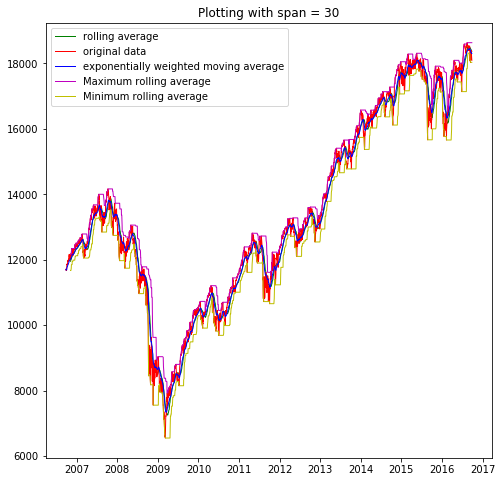

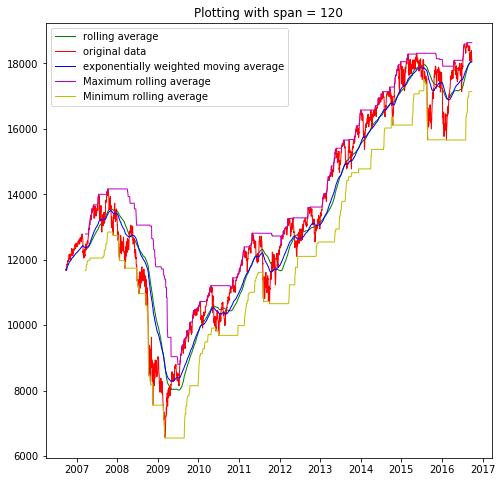

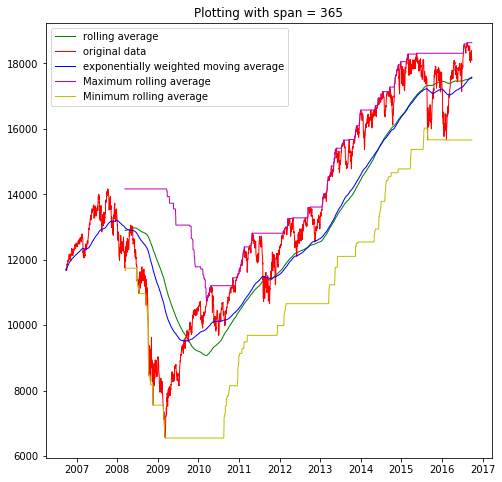

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt
# fig,ax1=plt.subplots(figsize=(8,8))
data=pd.read_csv('DJIA.csv', header=0)
dates=pd.to_datetime(data['DATE'], format='%Y-%m-%d')
A=data.set_index(dates).drop('DATE', axis=1)
A=pd.to_numeric(A.VALUE, errors='coerce')
A=A.dropna()
A
# data['VALUE']=pd.to_numeric(data['VALUE'],errors = "coerce")
xcv = [30,120,365]
for i in xcv:
    plt.figure(figsize=(8,8))
    plt.plot(A.rolling(window=i).mean() , color='g', lw=1, label='rolling average')
    plt.plot(A.index, A.values, color='r',lw=1, label='original data')
    plt.plot(A.index, A.ewm(span=i).mean(), color='b', lw=1, label='exponentially weighted moving average')
    plt.plot(A.index, A.rolling(window=i).max(), 'm', lw=1, label='Maximum rolling average')
    plt.plot(A.index, A.rolling(window=i).min(), 'y', lw=1, label='Minimum rolling average')
    plt.legend()
    plt.title('Plotting with span = '+ str(i))
    plt.show()